In this project, you are going to work on the The "Census Income" data set from the UCI Machine Learning Repository that contains the income information for over 48,000 individuals taken from the 1994 US census.
For more details about this dataset, you can refer to the following link: https://archive.ics.uci.edu/ml/datasets/census+income
Problem Statement:
In this project, initially you need to preprocess the data and then develop an understanding of different features of the data by performing exploratory analysis and creating visualizations.Further, after having sufficient knowledge about the attributes you will perform a predictive task of classification to predict whether an individual makes over 50K a year or less,by using different Machine Learning Algorithms. 
 Tasks to be done:
1. Data Preprocessing:
a) Replace all the missing values with NA.
b) Remove all the rows that contain NA values. 


In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score


### Read Data

In [93]:
#load census data
census= pd.read_csv('/content/census-income.csv')

#display first ten data
census.head(10)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [96]:
#display last five data
census.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
#DISPLAY ALL COLUMN NAMES OF census
census.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

### EDA

In [97]:
#To remove unwanted spaces from both the end of a string
census.columns=census.columns.str.strip()
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', ''],
      dtype='object')

In [99]:
#To know the shape of census
census.shape

(32561, 15)

In [7]:
#To know all the info of census
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14                  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#To describe count,mean etc of census 
census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [100]:
#Checking number of null values present
census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
                  0
dtype: int64

<h3>1. Data Preprocessing:</h3>
<ul>
    <li>a) Replace all the missing values with NA.</li>
    <li>b) Remove all the rows that contain NA values.</li>
</ul>

In [10]:
census.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
                  0
dtype: int64

In [11]:
#To know the value count of data
census.value_counts()

age  workclass          fnlwgt  education      education-num  marital-status       occupation          relationship    race    sex      capital-gain  capital-loss  hours-per-week  native-country        
25    Private           195994   1st-4th       2               Never-married        Priv-house-serv     Not-in-family   White   Female  0             0             40               Guatemala       <=50K    3
23    Private           240137   5th-6th       3               Never-married        Handlers-cleaners   Not-in-family   White   Male    0             0             55               Mexico          <=50K    2
38    Private           207202   HS-grad       9               Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0             0             48               United-States   >50K     2
30    Private           144593   HS-grad       9               Never-married        Other-service       Not-in-family   Black   Male    0             0             40       

In [101]:
#Finding and removing NA's
categorical=[col for col in census.columns if census[col].dtypes=='O']
for col in categorical:
    census[col]=np.where(census[col].str.strip()=='?','NA',census[col])
    census.drop(census[census['workclass']=='NA'].index,inplace=True)

census.shape

(30725, 15)

In [13]:
#To know type of data used
census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
                  object
dtype: object

<h3>2. Data Manipulation:</h3>

<h5>a) Extract the “education” column and store it in “census_ed” .</h5>

In [15]:
census_ed=census[['education']]
census_ed

,education
0,Bachelors
1,Bachelors
2,HS-grad
3,11th
4,Bachelors
...,...
32556,Assoc-acdm
32557,HS-grad
32558,HS-grad
32559,HS-grad


<h5>b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.</h5>

In [16]:
census_seq=census.loc[:,"age":"relationship"]
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


In [103]:
#another option
census_seq=census.iloc[:,0:8]
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


<h5>c) Extract the column number “5”, “8”, “11” and store it in “census_col”.</h5>

In [110]:
census_col=census.iloc[:,[4,7,10]] #another method census.iloc[:,4:12:3]
census_col

,education-num,relationship,capital-gain
0,13,Not-in-family,2174
1,13,Husband,0
2,9,Not-in-family,0
3,7,Husband,0
4,13,Wife,0
...,...,...,...
32556,12,Wife,0
32557,9,Husband,0
32558,9,Unmarried,0
32559,9,Own-child,0


<h5>d) Extract all the male employees who work in state-gov and store it in “male_gov”.</h5>

In [111]:

male_gov=census[(census['sex'].str.strip()=='Male') & (census['workclass'].str.strip()=='State-gov')].reset_index()
male_gov


,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
2,34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
3,48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
4,123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,32163,36,State-gov,135874,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
805,32241,45,State-gov,231013,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
806,32321,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
807,32324,42,State-gov,138162,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


<h5>e) Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.</h5>

In [112]:
census_us=census[(census['age']==39) & ((census['education'].str.strip()=='Bachelors') | 
                                      (census['native-country'].str.strip()=='United-States'))].reset_index()
census_us

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
2,129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
4,320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,32146,39,Private,117381,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
745,32260,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
746,32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
747,32468,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K


<h5>f) Extract 200 random rows from the “census” data frame and store it in “census_200”.</h5>

In [113]:
census_200= census.sample(200)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
15366,31,Private,377850,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,65,United-States,<=50K
11160,26,Private,154966,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Puerto-Rico,<=50K
1882,44,Self-emp-not-inc,246862,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,Italy,>50K
12971,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
19677,29,Local-gov,195520,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,26,Private,350853,5th-6th,3,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,NA,<=50K
4426,29,Private,120986,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,65,United-States,<=50K
30009,28,Self-emp-not-inc,35032,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,<=50K
13199,55,Private,105582,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,3103,0,40,United-States,>50K


<h5>g) Get the count of different levels of the “workclass” column.</h5>

In [114]:
len(census['workclass'].unique())

8

In [115]:
#renaming the last column to Income
census.rename(columns={ '':'Income'},inplace=True,errors='raise')

<h5>h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.</h5>

In [23]:
census.groupby('workclass').mean('capital-gain')['capital-gain']

workclass
 Federal-gov          833.232292
 Local-gov            880.202580
 Never-worked           0.000000
 Private              889.217792
 Self-emp-inc        4875.693548
 Self-emp-not-inc    1886.061787
 State-gov            701.699538
 Without-pay          487.857143
Name: capital-gain, dtype: float64

<h5>i) Create a separate dataframe with the details of males and females from the census data that has income more than 50,000. </h5>

In [24]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [25]:
m_df=census[(census['sex'].str.strip()=='Male') & (census['Income'].str.strip()=='>=50K')].reset_index()

m_df.head(200)


,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income


In [26]:
f_df=census[(census['sex']=='Female') & (census['Income']=='>50K')].reset_index() 
f_df.head(200)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income


<h5>j) Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually. </h5>

In [27]:
us_emp=census[(census['native-country'].str.strip()=='United-States') & 
              (census['workclass'].str.strip()=='Private') 
              & (census['Income'].str.strip()=='<=50K')].reset_index()
us_emp

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
3,12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
4,13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15589,32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
15590,32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
15591,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
15592,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<h5>k) Calculate the percentage of married people in the census data.</h5>

In [28]:
married_people=(len(census[census['marital-status'].str.contains('Married-')])/len(census))*100
married_people

48.006509357200976

<h5>l) Calculate the percentage of high school graduates earning more than 50,000 annually</h5>

In [29]:
hs_grad=(len(census[(census['education'].str.strip()=='HS-grad') 
                    & (census['Income'].str.strip()=='>50K')])/len(census))*100
hs_grad

5.3018714401952804

<h3>Visualize the data</h3>

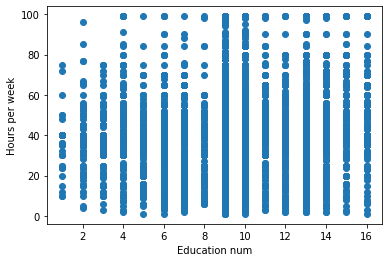

In [30]:


plt.xlabel('Education num')
plt.ylabel('Hours per week')
plt.scatter(x='education-num',y='hours-per-week',data=census)

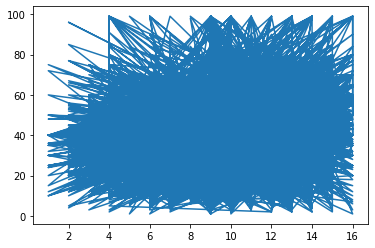

In [31]:
plt.plot(census['education-num'],census['hours-per-week'])

<h3>Outliers</h3>

{'boxes': [<matplotlib.lines.Line2D at 0x7effcde91110>,
 'caps': [<matplotlib.lines.Line2D at 0x7effcde98ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7effcde9eb10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7effcde9e5d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7effcde98050>,
  <matplotlib.lines.Line2D at 0x7effcdea7ad0>]}

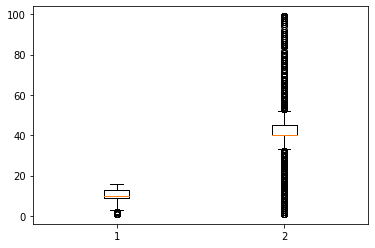

In [32]:
plt.boxplot([census['education-num'],census['hours-per-week']])

<h3>3. Linear Regression:</h3>
<p>a) Build a simple linear regression model as follows:</p>

<ul>
    <li>Divide the dataset into training and test sets in 70:30 ratio.</li>
    <li>Build a linear model on the test set where the dependent variable is “hours.per.week” and the independent variable is “education.num”.</li>
    <li>Predict the values on the train set and find the error in prediction. </li>
    <li>Find the root-mean-square error (RMSE).</li>
    
</ul>

In [33]:
x=pd.DataFrame(census['education-num'])
y=pd.DataFrame(census['hours-per-week'])
x

,education-num
0,13
1,13
2,9
3,7
4,13
...,...
32556,12
32557,9
32558,9
32559,9


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=2)
x_train

,education-num
9250,9
2585,9
15140,10
22964,10
10634,9
...,...
12528,9
32096,11
7064,14
2754,4


In [35]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)


LinearRegression()

<h3>Prediected values</h3>

In [36]:
y_pred= linear_reg.predict(x_test)


In [37]:
linear_reg.coef_

array([[0.65735657]])

In [38]:
linear_reg.intercept_

array([34.33477008])

In [39]:
error= y_test-y_pred
error

,hours-per-week
26065,7.119595
14091,-2.880405
6461,-23.908336
16826,-0.250979
4418,-0.908336
...,...
5839,17.119595
17473,-0.908336
25471,4.091664
15625,-0.250979


In [40]:
print('Coefficient:',linear_reg.coef_)
print('Intercept of line:',linear_reg.intercept_)
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 socre:',r2_score(y_test,y_pred))

Coefficient: [[0.65735657]]
Intercept of line: [34.33477008]
Mean squared error: 135.9850466806129
Root mean square error: 11.661262653787235
R2 score: 0.03031021827794833


<h2>4. Logistic Regression:</h2>
<ul>a) Build a simple logistic regression model as follows:
    <li> Divide the dataset into training and test sets in 65:35 ratio.</li>
    <li>Build a logistic regression model where the dependent variable is “X”(yearly income) and the independent variable is “occupation”.</li>
    <li>Predict the values on the test set.</li>
    <li>Build a confusion matrix and find the accuracy.</li>
</ul>

In [41]:
data_occupation_income= census.loc[:,['occupation','Income']]
le=LabelEncoder()
data_occupation_income['occupation']=le.fit_transform(data_occupation_income['occupation'])
data_occupation_income['Income']=le.fit_transform(data_occupation_income['Income'])


# data_occupation_income

In [43]:
x=pd.DataFrame(data_occupation_income.occupation)
y=pd.DataFrame(data_occupation_income.Income)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=2)

In [45]:
logic_reg=LogisticRegression()
logic_reg.fit(x_train,y_train)
logic_reg.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7516273014692207

In [46]:
y_pred=logic_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
confusion_matrix(y_test,y_pred)

array([[8083,    0],
       [2671,    0]])

In [48]:
accuracy_score(y_test,y_pred)

0.7516273014692207

<h3>
<ul>
    <li>Divide the dataset into training and test sets in 80:20 ratio.</li>
    <li>Build a logistic regression model where the dependent variable is “X”(yearly income) and independent variables are “age”, “workclass”, and “education”.</li>
    <li>Predict the values on the test set.</li>
    <li>Build a confusion matrix and find the accuracy.</li>
</ul>

In [49]:
census.shape

(30725, 15)

In [50]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [51]:
X=census[['age','workclass','education']]
Y=pd.DataFrame(census.Income)
Y.value_counts()

Income
 <=50K    23075
 >50K      7650
dtype: int64

In [52]:
le= LabelEncoder()
X['workclass']=le.fit_transform(X['workclass'])
X['education']=le.fit_transform(X['education'])

Y['Income']=le.fit_transform(Y['Income'])
Y['Income']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 30725, dtype: int64

In [53]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.2, random_state=1)

In [117]:
lr= LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [118]:
y_pred= pd.DataFrame(lr.predict(X_test))
y_pred=y_pred[0].apply(np.int64)


In [122]:
output_logic=pd.DataFrame()
output_logic['Actual']=Y['Income']
output_logic['Pred']=y_pred
output_logic.head(10)

,Actual,Pred
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,1,0.0
8,1,0.0
9,1,0.0


In [123]:
census_logic= census.copy()
census_logic['Income_pred']=y_pred
census_logic.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income,Income_pred
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0.0


In [58]:
confusion_matrix(Y_test,y_pred)

array([[4484,  125],
       [1491,   45]])

In [59]:
accuracy_score(Y_test,y_pred)

0.7370219690805533

<h3>5. Decision Tree:
a) Build a decision tree model as follows:</h3>
<ul>
    <li>Divide the dataset into training and test sets in 70:30 ratio.</li>
    <li>Build a decision tree model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables.</li>
     <li>Predict the values on the test set.</li>
    <li>Build a confusion matrix and calculate the accuracy.</li>
</ul>

In [60]:
X=census.drop(['Income'],axis=1)
Y=pd.DataFrame(census['Income'])
Y

,Income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [61]:
census.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.043884,0.080420,0.060463,0.102192
fnlwgt,-0.076628,1.000000,-0.043515,-0.000200,-0.010026,-0.022761
education-num,0.043884,-0.043515,1.000000,0.124257,0.079357,0.151367
capital-gain,0.080420,-0.000200,0.124257,1.000000,-0.032325,0.079560
capital-loss,0.060463,-0.010026,0.079357,-0.032325,1.000000,0.053998
hours-per-week,0.102192,-0.022761,0.151367,0.079560,0.053998,1.000000


In [62]:
X['workclass']=le.fit_transform(X['workclass'])
X['education']=le.fit_transform(X['education'])
X['marital-status']=le.fit_transform(X['marital-status'])
X['occupation']=le.fit_transform(X['occupation'])
X['relationship']=le.fit_transform(X['relationship'])
X['race']=le.fit_transform(X['race'])
X['sex']=le.fit_transform(X['sex'])
X['native-country']=le.fit_transform(X['native-country'])
Y['Income']= le.fit_transform(Y['Income'])

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=2)
Y_train

,Income
9250,0
2585,0
15140,0
22964,1
10634,0
...,...
12528,0
32096,0
7064,1
2754,0


In [64]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [65]:
y_pred=pd.DataFrame(dt_model.predict(X_test))

In [66]:
output_DT= pd.DataFrame()
output_DT['actual']=Y['Income']
output_DT['pred']=y_pred
output_DT

,actual,pred
0,0,1.0
1,0,1.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
32556,0,NaN
32557,1,NaN
32558,0,NaN
32559,0,NaN


In [67]:
confusion_matrix(Y_test,y_pred)

array([[6004,  931],
       [ 813, 1470]])

In [68]:
accuracy_score(Y_test,y_pred)

0.810804946843133

<h3>6. Random Forest:
 a) Build a random forest model as follows:</h3>

<ul>
    <li>Divide the dataset into training and test sets in 80:20 ratio</li>
    <li>Build a random forest model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables and number of trees as 300.</li>
    <li>Predict values on the test set</li>
    <li>Build a confusion matrix and calculate the accuracy</li>
    
</ul>

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y['Income'],test_size=.2,random_state=3)


In [70]:
rf= RandomForestClassifier(n_estimators=300)
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)

In [71]:
confusion_matrix(Y_test,y_pred)

array([[4294,  329],
       [ 571,  951]])

In [72]:
accuracy_score(Y_test,y_pred)

0.853539462978031

<h3>7.Use the population dataset, and perform the following:</h3>
<ul>
    <li>1. EDA on the time series to find trends and seasonality.</li>
    <li>2. Forecast the population on the given dataset for the next 6 months. </li>
</ul>

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [74]:
population=pd.read_csv('/content/popdata.csv',parse_dates=['date'])
population.set_index('date',inplace=True)
population.tail()

,value
date,
2019-08-01,300581.333
2019-09-01,300775.872
2019-10-01,300972.035
2019-11-01,301144.949
2019-12-01,301299.946


<h3>Definition of additive time series:</h3>
<h4>Value= Base value + Trend + Seasonality + Error</h4>
<h3>Definition of multiplicative time series:</h3>
<h4>Value= Base value * Trend * Seasonality * Error</h4>

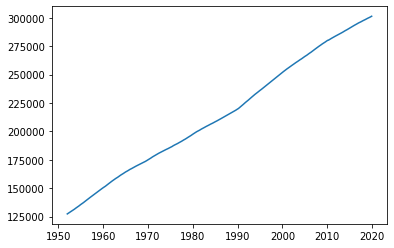

In [75]:
plt.plot(population['value'])

In [76]:
#multiplicative decomposition
mul_res= seasonal_decompose(population.value,model='multiplicative')#,period=1

#additive decomposition
add_res= seasonal_decompose(population.value,model='additive')#,period=1


Text(0.5, 0.98, 'Multiplicative decomposition')

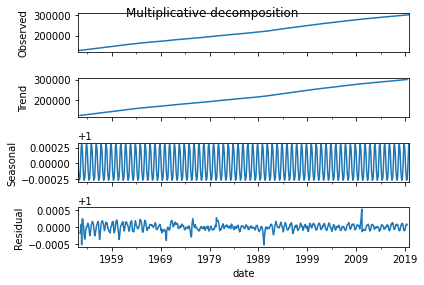

In [77]:
mul_res.plot().suptitle('Multiplicative decomposition', fontsize=12)
# plt.show()

Text(0.5, 0.98, 'Additive decomposition')

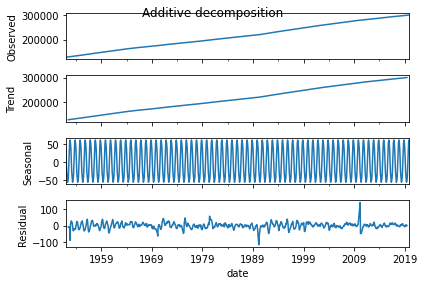

In [78]:
add_res.plot().suptitle('Additive decomposition',fontsize=12)

In [79]:
new_add_df=pd.DataFrame({'seasonality':add_res.seasonal,'trend':add_res.trend,'residual':add_res.resid,
                         'actual_values':add_res.observed})
new_add_df

,seasonality,trend,residual,actual_values
date,,,,
1952-01-01,38.761499,NaN,NaN,127299.000
1952-02-01,6.385953,NaN,NaN,127517.000
1952-03-01,-28.698926,NaN,NaN,127721.000
1952-04-01,-42.365082,NaN,NaN,127933.000
1952-05-01,-56.865341,NaN,NaN,128130.000
...,...,...,...,...
2019-08-01,-14.328245,NaN,NaN,300581.333
2019-09-01,21.378230,NaN,NaN,300775.872
2019-10-01,53.902023,NaN,NaN,300972.035


In [80]:
new_mul_df=pd.DataFrame({'seasonality':mul_res.seasonal,'trend':mul_res.trend,'residual':mul_res.resid,
                         'actual_values':mul_res.observed})
new_mul_df

,seasonality,trend,residual,actual_values
date,,,,
1952-01-01,1.000193,NaN,NaN,127299.000
1952-02-01,1.000038,NaN,NaN,127517.000
1952-03-01,0.999866,NaN,NaN,127721.000
1952-04-01,0.999804,NaN,NaN,127933.000
1952-05-01,0.999728,NaN,NaN,128130.000
...,...,...,...,...
2019-08-01,0.999919,NaN,NaN,300581.333
2019-09-01,1.000097,NaN,NaN,300775.872
2019-10-01,1.000260,NaN,NaN,300972.035


<h2>AdFuler test for stationarity</h2>
<h3>Definition of stationarity: Constant mean and variance</h3>

In [81]:
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [82]:
#ADF Test - null hypothesis - non-stationary - if p-val <5% reject null hypothesis, otherwise accept the hypothesis
def ad_test(dataset):

    adfuler_res= adfuller(dataset,autolag='AIC')
    print(f'ADF stats {adfuler_res[0]}')
    print(f'p-value {adfuler_res[1]}')

    for k,v in adfuler_res[4].items():
        print('Critical values')
        print(f' {k},{v}')
    if adfuler_res[1] < .05:
        print("Data is stationary ")
    else:
        print("Data is non-stationary")

In [83]:
ad_test(population['value'])

ADF stats -0.6653174109473156
p-value 0.855529777911024
Critical values
 1%,-3.4385711275998583
Critical values
 5%,-2.8651686574447375
Critical values
 10%,-2.568702230639255
Data is non-stationary


<h3>Differencing</h3>

In [84]:
population['difference_1']= population['value'] - population['value'].shift(1)
population.head()

,value,difference_1
date,,
1952-01-01,127299.0,NaN
1952-02-01,127517.0,218.0
1952-03-01,127721.0,204.0
1952-04-01,127933.0,212.0
1952-05-01,128130.0,197.0


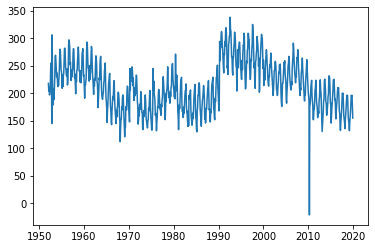

In [85]:
plt.plot(population['difference_1'])

In [86]:
population['difference_12']= population['value'] - population['value'].shift(60)

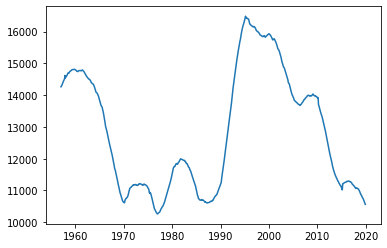

In [87]:
plt.plot(population['difference_12'])

In [88]:
ad_test(population['difference_12'].dropna())

ADF stats -2.9375454067784914
p-value 0.04115294977030601
Critical values
 1%,-3.439134355513998
Critical values
 5%,-2.865416893922985
Critical values
 10%,-2.56883447171999
Data is stationary 


In [89]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(population['difference_12'].dropna(),nlags=60)
lag_pacf=pacf(population['difference_12'].dropna(),nlags=60)

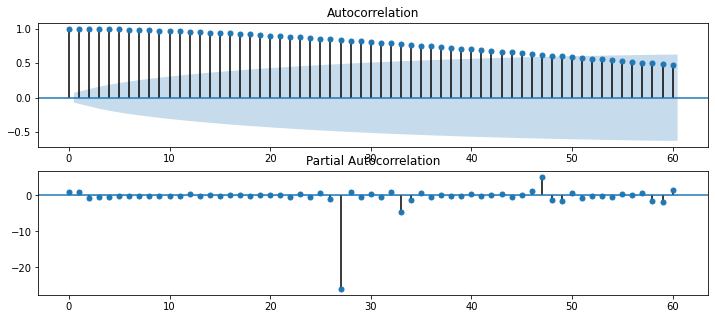

In [90]:
import statsmodels.api as sm
fig= plt.figure(figsize=(12,5))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(population['difference_12'].dropna(),lags=60,ax=ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(population['difference_12'].dropna(),lags=60,ax=ax2)

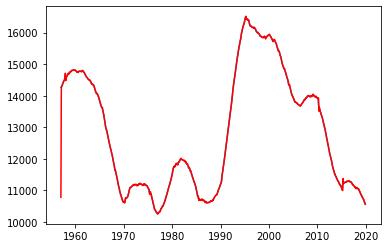

In [91]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(population['difference_12'].dropna(),order=(2,0,0))
results= model.fit()
plt.plot(population['difference_12'].dropna())
plt.plot(results.fittedvalues,color='r')

In [92]:
arima_prediction=pd.Series(results.fittedvalues)
arima_prediction

date
1957-01-01    10781.363981
1957-02-01    14261.564483
1957-03-01    14292.679572
1957-04-01    14313.379904
1957-05-01    14352.748995
                  ...     
2019-08-01    10717.965344
2019-09-01    10667.667074
2019-10-01    10629.091111
2019-11-01    10600.826310
2019-12-01    10558.768401
Length: 756, dtype: float64